In [1]:
import pandas as pd
from settings import *
from scrape import *
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib inline

In [2]:
#scrapePage(anacUrl)

In [3]:
situacaoVoos = []
fileCsvFinal = pd.DataFrame()
for ano in range(2015, 2020):
    print(f"Lendo os arquivos do ano {ano}")
    for i in range(1, 13):
            sep = [';', ',','\t']
            sepIndex = 0
            while True:
                try:
                    fileCsv = pd.read_csv(
                        f'data/{ano}-{i:02}.csv', encoding='ISO-8859-1', sep=sep[sepIndex], low_memory=False)
                    if ('internet' in fileCsv.columns[0]):
                        fileCsv.columns = fileCsv.iloc[0]
                        fileCsv = fileCsv[1:]
                    if len(fileCsv.columns) <= 1:
                        raise ValueError('sepIndex')
                    else:
                        try:
                            fileCsv = fileCsv.drop(columns='Data Prevista')
                        except:
                            pass
                        fileCsv.columns = ['ICAO Empresa Aérea', 'Número Voo', 'Código DI', 'Código Tipo Linha',
                                        'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino', 'Partida Prevista',
                                        'Partida Real', 'Chegada Prevista', 'Chegada Real', 'Situação Voo',
                                        'Código Justificativa']
                    
                    fileCsv = fileCsv.assign(Ano = ano)
                    fileCsv = fileCsv.assign(Mes = i)
                    
                    fileCsvFinal = pd.concat([fileCsvFinal, fileCsv])
                    print(len(fileCsvFinal))
                    break
                except Exception as e:
                    if e.args[0] == 'sepIndex':
                        if (sepIndex < 3):
                            sepIndex += 1
                    else:
                        print(e)
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.upper()
fileCsvFinal['Situação Voo'] = fileCsvFinal['Situação Voo'].str.replace('NÃO REALIZADO', 'CANCELADO', regex=False)

Lendo os arquivos do ano 2015
114636
216629
327636
434556
542910
648608
760762
868806
976224
1085370
1189754
1301570
Lendo os arquivos do ano 2016
1415829
1517497
1619362
1718322
1810178
1898218
1990804
2082306
2168746
2258370
2345436
2440576
Lendo os arquivos do ano 2017
2539374
2624374
2716233
2802437
2893114
2980986
3077896
3172081
3261534
3355080
3446623
3546060
Lendo os arquivos do ano 2018
3649557
3739167
3829956
3909737
3993491
4073793
4164009
4248397
4329316
4412963
4492988
4580616
Lendo os arquivos do ano 2019
4672433
4751959
4835021
4912465
4989166
5063355
5149027
5229616
5310153
5394392
5475390
5563607


In [4]:
fileCsvFinal = pd.read_csv('csvFinal.csv')

/home/gabriel/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


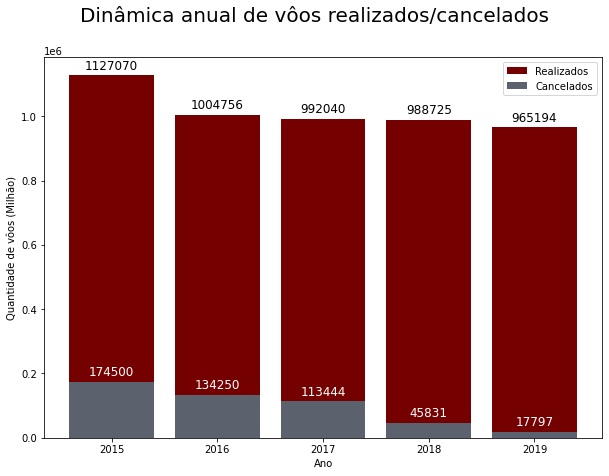

In [90]:

fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle("Dinâmica anual de vôos realizados/cancelados", fontsize=20)
SituacaoPorAno = pd.DataFrame()
for situacao in fileCsvFinal['Situação Voo'].unique():
    df = fileCsvFinal.loc[fileCsvFinal['Situação Voo'] == situacao]
    df = df['Ano'].value_counts()
    SituacaoPorAno= pd.concat([SituacaoPorAno, df], axis=1)
SituacaoPorAno.columns = ['Realizado', 'Cancelado']
graphRealizados = plt.bar(SituacaoPorAno['Realizado'].index, SituacaoPorAno['Realizado'].values, color='#740000', label = 'Realizados')
graphCancelados = plt.bar(SituacaoPorAno['Cancelado'].index, SituacaoPorAno['Cancelado'].values, color='#5b616d', label = 'Cancelados')

def autolabel(graph, color):
  
    for rect in graph:
        valor = rect.get_height()
        ax.annotate(f'{valor}',
                    xy=(rect.get_x() + rect.get_width() / 2, valor),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=color,
                    fontsize=12)

plt.ylabel('Quantidade de vôos (Milhão)')
plt.xlabel('Ano')

plt.legend(handles=[graphRealizados, graphCancelados])

autolabel(graphRealizados, '#000')
autolabel(graphCancelados, '#FFF')

Realizados : 5077785
Cancelados : 485822


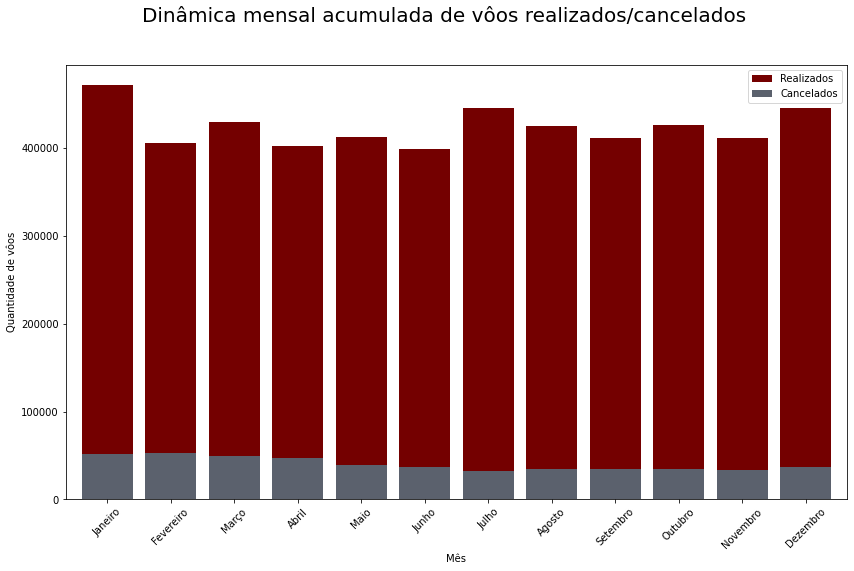

In [95]:
fig, axs = plt.subplots(figsize=(14, 8))
fig.suptitle("Dinâmica mensal acumulada de vôos realizados/cancelados", fontsize=20)
SituacaoPorMes = pd.DataFrame()
colors = ['#ff0000','#ffda00','#e76ec6','#03da00','#000','#e7bec6','#004000','#9abec6','#5b196e','#03da00','#03da00','#03da00']
color=plt.cm.Paired(np.arange(12))
# print(color)
for mes in range(1, 13):
    df = fileCsvFinal.loc[fileCsvFinal['Mes'] == mes]
    df = df['Situação Voo'].value_counts()
    SituacaoPorMes= pd.concat([SituacaoPorMes, df], axis=1)
SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
SituacaoPorMes.iloc[0].plot(kind='bar', ax=axs, width=0.8, color='#740000', label="Realizados")
SituacaoPorMes.iloc[1].plot(kind='bar', ax=axs, width=0.8, color="#5b616d", label="Cancelados")

plt.ylabel('Quantidade de vôos')
plt.xlabel('Mês')
plt.legend(handles=[graphRealizados, graphCancelados])

labels = axs.get_xticklabels()
for label in labels:
    label.set_rotation(45)
print(f"Realizados : {int(SituacaoPorMes.iloc[0].sum())}")
print(f"Cancelados : {int(SituacaoPorMes.iloc[1].sum())}")

In [96]:
colorPastel = plt.cm.Pastel1(np.arange(12))
# colorBlack
def f(ano):
    fig, axs = plt.subplots(nrows=1, figsize=(14, 8))
    fig.suptitle("Dinâmica mensal de vôos Realizados/Cancelados", fontsize=20)
    df = fileCsvFinal.loc[fileCsvFinal['Ano'] == ano]
    SituacaoPorMes = pd.DataFrame()
    for mes in range(1, 13):
        df2 = df.loc[df['Mes'] == mes]
        df2 = df2['Situação Voo'].value_counts()
        SituacaoPorMes= pd.concat([SituacaoPorMes, df2], axis=1)
    SituacaoPorMes.columns = ['Janeiro','Fevereiro','Março','Abril','Maio', 'Junho','Julho', 'Agosto','Setembro','Outubro', 'Novembro', 'Dezembro']
    SituacaoPorMes.iloc[0].plot(kind='bar', ax=axs, width=0.8, color="#740000", label="Realizados")
    SituacaoPorMes.iloc[1].plot(kind='bar', ax=axs, width=0.8, color='#5b616d', label="Cancelados")
        
    plt.ylabel('Quantidade de vôos')
    plt.xlabel('Mês')
    plt.legend(handles=[graphRealizados, graphCancelados])

    labels = axs.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
    print(f"Média de voos realizados : {np.around(int(SituacaoPorMes.iloc[0].mean()))}")
    print(f"Média de voos cancelados : {np.around(int(SituacaoPorMes.iloc[1].mean()))}")
#     plt.ylabel('Quantidade de voos por mês')


interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

## Empresas com maior número de voos realizados e cancelados

In [48]:
explode = (0.05, 0, 0, 0, 0)
pieColors=['#ff0000', '#5b616d', '#7a3f7a', '#80a07a', '#c3867a']
def f(ano):
    fig = plt.figure(figsize=(8,5))
    fig.suptitle("Participação anual por companhia aérea", fontsize=20)
    voosRealizados = fileCsvFinal[fileCsvFinal['Situação Voo'] == 'REALIZADO']
    voosRealizados = voosRealizados[voosRealizados['Ano'] == ano]['ICAO Empresa Aérea'].value_counts()
    outrasEmpresas = voosRealizados[voosRealizados < voosRealizados[4]]
    outrasEmpresasRealizadosDf = pd.Series({'Outros' : outrasEmpresas.sum()})
    voosRealizadosDF = pd.concat([voosRealizados[:4], outrasEmpresasRealizadosDf])

    voosCancelados = fileCsvFinal[fileCsvFinal['Situação Voo'] == 'CANCELADO']
    voosCancelados = voosCancelados[voosCancelados['Ano'] == ano]['ICAO Empresa Aérea'].value_counts()
    outrasEmpresasCancelados = voosCancelados[voosCancelados < voosCancelados[4]]
    outrasEmpresasCanceladosDf = pd.Series({'Outros' : outrasEmpresasCancelados.sum()})
    voosCanceladosDF = pd.concat([voosCancelados[:4], outrasEmpresasCanceladosDf])
    
    
    ax1 = plt.subplot2grid((1,2),(0,0))
    ax1.set_title("Realizado")
    plt.pie(voosRealizadosDF, autopct='%1.1f%%', explode=explode, shadow=True, labels=voosRealizadosDF.index, colors=pieColors)
    
    ax2 = plt.subplot2grid((1,2),(0,1))
    ax2.set_title("Cancelados")
    plt.pie(voosCanceladosDF, autopct='%1.1f%%', explode=explode, shadow=True, labels=voosCanceladosDF.index, colors=pieColors)
interact(f, ano=widgets.IntSlider(min=2015,max=2019,step=1,value=2015))

interactive(children=(IntSlider(value=2015, description='ano', max=2019, min=2015), Output()), _dom_classes=('…

<function __main__.f(ano)>

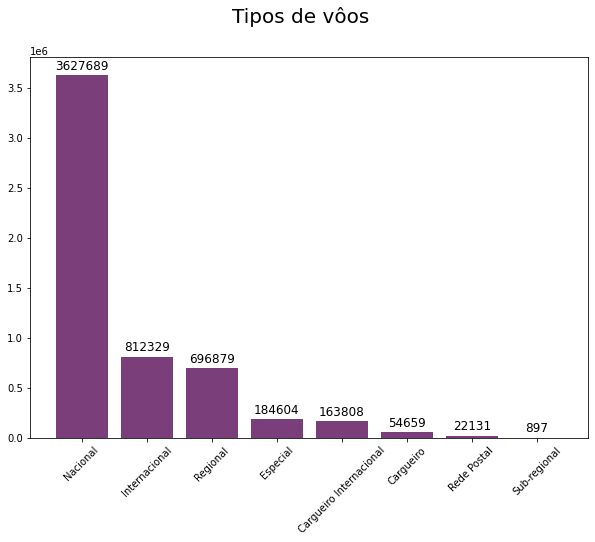

In [130]:
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle("Tipos de vôos", fontsize=20)
tiposDeVoos = plt.bar(linhas.index[:-1], linhas.values[:-1], color='#7a3f7a')
plt.xticks(labels=['Nacional','Internacional','Regional','Especial','Cargueiro Internacional','Cargueiro','Rede Postal','Sub-regional'], ticks=linhas.index[:-1])
def autolabel(graph, color):
  
    for rect in graph:
        valor = rect.get_height()
        ax.annotate(f'{valor}',
                    xy=(rect.get_x() + rect.get_width() / 2, valor),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=color,
                    fontsize=12)
autolabel(tiposDeVoos, '#000')
labels = ax.get_xticklabels()
for label in labels:
    label.set_rotation(45)

In [ ]:
partidaPrevista = fileCsvFinal['Partida Prevista']
partidaPrevista = partidaPrevista.str.strip()
partidaPrevista = partidaPrevista.replace(r'^\s*$', np.nan, regex=True)
partidaPrevista = partidaPrevista.dropna()
size = []
for i in partidaPrevista:
    size.append(len(i))